In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the file as a continuous stream of floating point numbers stored as binary, big-endian format
#f = '/Users/simon/Data/SA/GDP00037/Data/SA_Geophysic_Reference_Model/SGrid/SA_Geophysics_Reference_Model_SGrid_Magnetic_Inversion_Constrained@@'
f = '/Users/simon/Data/SA/GDP00037/Data/SA_Geophysic_Reference_Model/SGrid/SA_Geophysics_Reference_Model_SGrid_Rock_Unit@@'
data = np.fromfile(f, '>f4')



In [2]:
# Here we verify that the number of elements in the data array is consistent with the 
# three dimensions of the reference model.
# Actually, each dimension has one less element than the stated dimensions in the header file
# (so likely that the intention is for a pixel-registered grid)

print(data.shape)
print(382 * 427 * 49)


(7992586,)
7992586


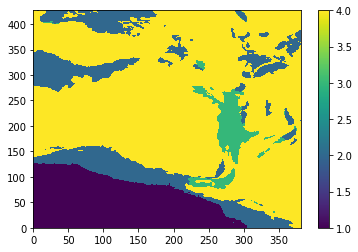

In [3]:
# reshape the data into a 3D array
# some trial-and-error used to infer the order of reshaping
sus = data.reshape((49,427,382))

# elements with -99999. are dummies, set them to be nan
sus[sus==-99999.] = np.nan

# plot one of the layers at an intermediate depth
plt.pcolormesh(sus[12,:,:])
plt.colorbar()
plt.show()


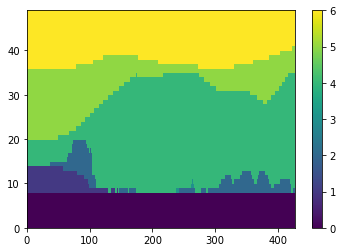

In [4]:
# by slicing along a different dimension we can plot a vertical cross section
plt.pcolormesh(sus[:,:,200])
plt.colorbar()
plt.show()


In [66]:
petrophysics_sites= pd.read_excel('/Users/simon/Data/SA/GDP00037/Data/Petrophysics/Input_Data/SA_Petrophysics.xlsx', sheet_name='SA_Petrophysics_Collars')
petrophysics_sites


<ipython-input-66-8aa8601b402b>:1: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  petrophysics_sites= pd.read_excel('/Users/simon/Data/SA/GDP00037/Data/Petrophysics/Input_Data/SA_Petrophysics.xlsx', sheet_name='SA_Petrophysics_Collars')


,DH_NUMBER,DH_NAME,LONGITUDE,LATITUDE,X_Z52,Y_Z52,X_Z53,Y_Z53,X_Z54,Y_Z54,X_GA_LCC,Y_GA_LCC,X_SA_LCC,Y_SA_LCC,Z,MAXIMUM_DEPTH
0,1037,OBD 11,132.079839,-29.588927,7.983341e+05,6.722802e+06,217140.526062,6.723202e+06,-365652.138592,6.693319e+06,-183911.459692,-3.345659e+06,7.175582e+05,2.262921e+06,217.959972,232.70
1,1051,OBD 03,132.302947,-29.467355,8.203412e+05,6.735688e+06,238447.357193,6.737204e+06,-344935.866556,6.708533e+06,-162723.675207,-3.332031e+06,7.387969e+05,2.276934e+06,215.589460,218.00
2,1067,GILES 1,132.386783,-28.431710,8.317669e+05,6.850301e+06,244044.344797,6.852193e+06,-345223.045792,6.824578e+06,-156141.513040,-3.218496e+06,7.441411e+05,2.391771e+06,297.850000,1326.76
3,1577,OBD 08,132.805853,-29.017528,8.707726e+05,6.784093e+06,286298.469947,6.788087e+06,-299424.649839,6.762222e+06,-114971.989966,-3.282197e+06,7.864834e+05,2.327822e+06,219.808741,185.00
4,1582,OBD 01,132.568165,-29.310519,8.466127e+05,6.752323e+06,263813.624435,6.755156e+06,-320342.851687,6.727924e+06,-137489.931081,-3.314531e+06,7.640873e+05,2.294899e+06,239.975668,140.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1760,288776,MSDP10,135.663709,-32.653035,1.125513e+06,6.367496e+06,562243.070000,6.386982e+06,-740.360258,6.374573e+06,154896.599431,-3.681704e+06,1.062120e+06,1.927567e+06,210.747053,567.00
1761,288777,MSDP11,135.738256,-32.731589,1.131967e+06,6.358319e+06,569173.620000,6.378228e+06,6697.083172,6.366200e+06,161717.082023,-3.690444e+06,1.069037e+06,1.918831e+06,191.969913,498.20
1762,288778,MSDP12,135.662443,-32.674884,1.125241e+06,6.365075e+06,562109.250000,6.384561e+06,-736.926560,6.372140e+06,154746.951806,-3.684107e+06,1.061986e+06,1.925150e+06,193.451483,459.90
1763,288779,MSDP13,135.595031,-32.714558,1.118627e+06,6.361062e+06,555764.000000,6.380200e+06,-6843.797401,6.367413e+06,148416.819327,-3.688392e+06,1.055654e+06,1.920798e+06,210.477757,502.40


In [67]:
sus_measured = pd.read_csv('/Users/simon/Data/SA/GDP00037/Data/Petrophysics/Input_Data/SA_Petrophysics_Magnetic_Susceptibility.csv')
sus_measured


,DH_NUMBER,AVERAGE_DEPTH,MAGNETIC_SUSCEPTIBILITY
0,1037,192.3,0.00000
1,1037,194.0,0.00002
2,1037,195.9,0.00004
3,1037,197.8,0.00000
4,1037,199.9,0.00002
...,...,...,...
103914,288780,271.5,0.03410
103915,288780,272.5,0.01410
103916,288780,273.5,0.04360
103917,288780,274.5,0.03940


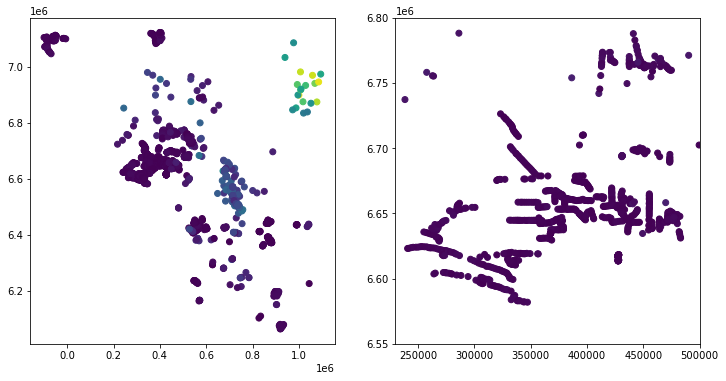

In [68]:
fig,ax = plt.subplots(nrows=1,ncols=2, figsize=(12,6))
ax[0].scatter(petrophysics_sites.X_Z53, petrophysics_sites.Y_Z53, c=petrophysics_sites.MAXIMUM_DEPTH)
ax[1].scatter(petrophysics_sites.X_Z53, petrophysics_sites.Y_Z53, c=petrophysics_sites.MAXIMUM_DEPTH)
ax[1].set_xlim(0.23e6, 0.5e6)
ax[1].set_ylim(6.55e6, 6.8e6)
plt.show()


In [69]:
sus_measured_3D = pd.merge(petrophysics_sites,sus_measured,on='DH_NUMBER')
sus_measured_3D


,DH_NUMBER,DH_NAME,LONGITUDE,LATITUDE,X_Z52,Y_Z52,X_Z53,Y_Z53,X_Z54,Y_Z54,X_GA_LCC,Y_GA_LCC,X_SA_LCC,Y_SA_LCC,Z,MAXIMUM_DEPTH,AVERAGE_DEPTH,MAGNETIC_SUSCEPTIBILITY
0,1037,OBD 11,132.079839,-29.588927,7.983341e+05,6.722802e+06,217140.526062,6.723202e+06,-365652.138592,6.693319e+06,-183911.459692,-3.345659e+06,7.175582e+05,2.262921e+06,217.959972,232.7,192.3,0.00000
1,1037,OBD 11,132.079839,-29.588927,7.983341e+05,6.722802e+06,217140.526062,6.723202e+06,-365652.138592,6.693319e+06,-183911.459692,-3.345659e+06,7.175582e+05,2.262921e+06,217.959972,232.7,194.0,0.00002
2,1037,OBD 11,132.079839,-29.588927,7.983341e+05,6.722802e+06,217140.526062,6.723202e+06,-365652.138592,6.693319e+06,-183911.459692,-3.345659e+06,7.175582e+05,2.262921e+06,217.959972,232.7,195.9,0.00004
3,1037,OBD 11,132.079839,-29.588927,7.983341e+05,6.722802e+06,217140.526062,6.723202e+06,-365652.138592,6.693319e+06,-183911.459692,-3.345659e+06,7.175582e+05,2.262921e+06,217.959972,232.7,197.8,0.00000
4,1037,OBD 11,132.079839,-29.588927,7.983341e+05,6.722802e+06,217140.526062,6.723202e+06,-365652.138592,6.693319e+06,-183911.459692,-3.345659e+06,7.175582e+05,2.262921e+06,217.959972,232.7,199.9,0.00002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109492,288780,MSDP14,135.615811,-32.692346,1.120735e+06,6.363409e+06,557725.810000,6.382651e+06,-5018.340390,6.369979e+06,150381.772247,-3.685973e+06,1.057612e+06,1.923244e+06,222.303477,276.0,271.5,0.03410
109493,288780,MSDP14,135.615811,-32.692346,1.120735e+06,6.363409e+06,557725.810000,6.382651e+06,-5018.340390,6.369979e+06,150381.772247,-3.685973e+06,1.057612e+06,1.923244e+06,222.303477,276.0,272.5,0.01410
109494,288780,MSDP14,135.615811,-32.692346,1.120735e+06,6.363409e+06,557725.810000,6.382651e+06,-5018.340390,6.369979e+06,150381.772247,-3.685973e+06,1.057612e+06,1.923244e+06,222.303477,276.0,273.5,0.04360
109495,288780,MSDP14,135.615811,-32.692346,1.120735e+06,6.363409e+06,557725.810000,6.382651e+06,-5018.340390,6.369979e+06,150381.772247,-3.685973e+06,1.057612e+06,1.923244e+06,222.303477,276.0,274.5,0.03940


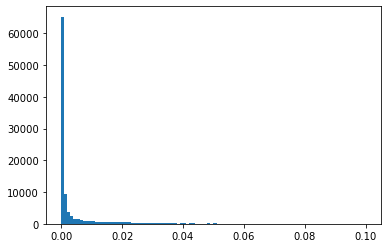

In [70]:
plt.hist(sus_measured_3D.MAGNETIC_SUSCEPTIBILITY, bins=np.linspace(0,0.1,101))
plt.show()


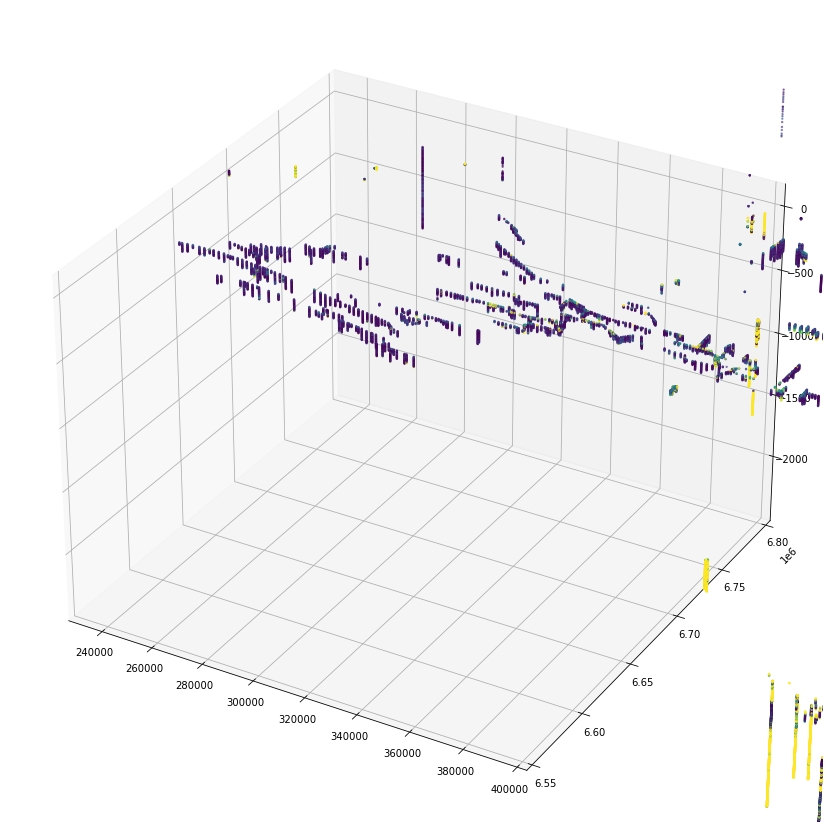

In [71]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(sus_measured_3D.X_Z53, sus_measured_3D.Y_Z53, -sus_measured_3D.AVERAGE_DEPTH, 
           c=sus_measured_3D.MAGNETIC_SUSCEPTIBILITY, vmax=0.001, alpha=0.5, s=2)
plt.xlim(0.23e6, 0.4e6)
plt.ylim(6.55e6, 6.8e6)
plt.show()


129.0083175 140.889221 -35.4829111 -26.001849


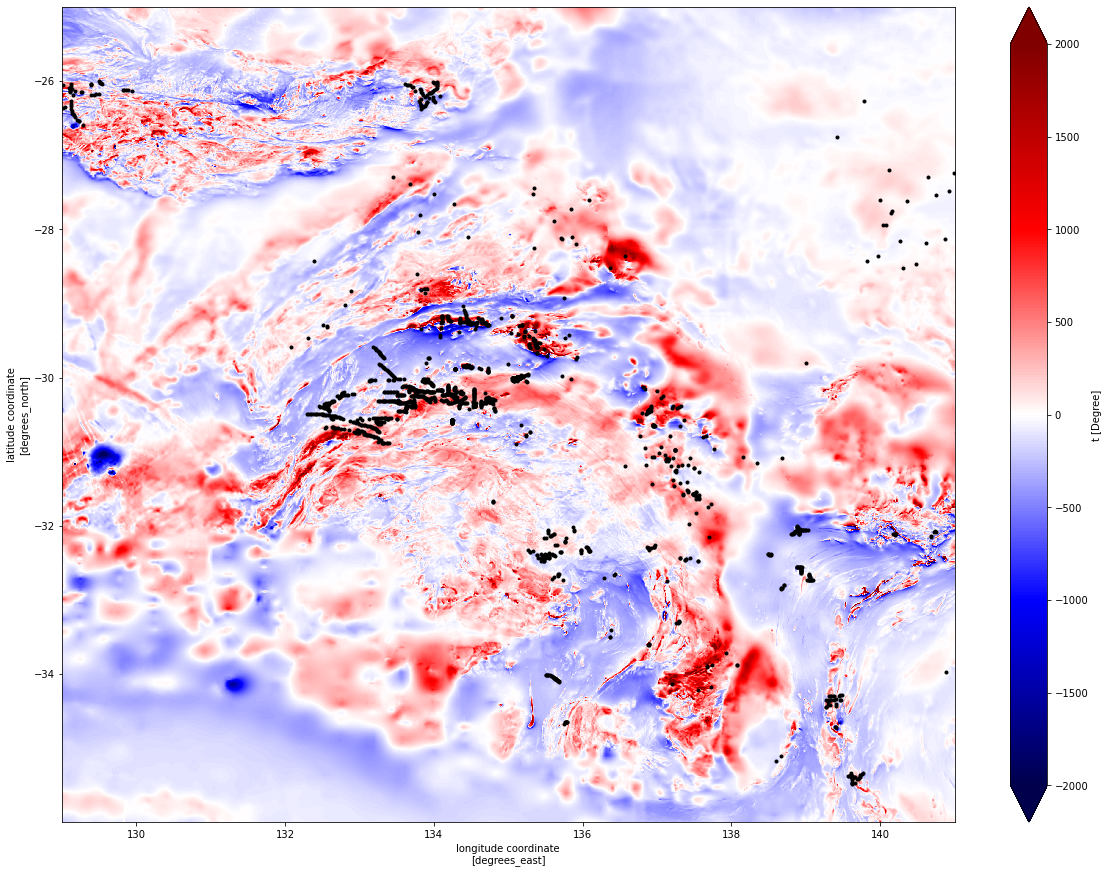

In [91]:
import xarray as xr

tmi = xr.open_dataarray('/Users/simon/Data/AustraliaGravMag/Magnetics/magmap04_off.nc')
tmi.data.shape

print(sus_measured_3D.LONGITUDE.min(), sus_measured_3D.LONGITUDE.max(), sus_measured_3D.LATITUDE.min(), sus_measured_3D.LATITUDE.max())
tmi_SA = tmi.where((tmi['lon']>129.) & (tmi['lon']<141.) & (tmi['lat']>-36.) & (tmi['lat']<-25.), drop=True)

plt.figure(figsize=(20,15))
tmi_SA.plot(vmin=-2000., vmax=2000., cmap='seismic')
plt.plot(petrophysics_sites.LONGITUDE, petrophysics_sites.LATITUDE, 'k.')


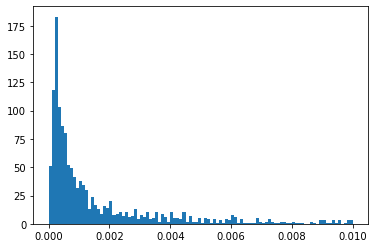

In [99]:
maxvals = []
sus_groups = sus_measured_3D.groupby(['DH_NAME'])
for group in sus_groups.groups:
    sus_for_hole = sus_groups.get_group(group)
    maxvals.append(sus_for_hole.MAGNETIC_SUSCEPTIBILITY.max())
    
plt.hist(maxvals, bins=np.linspace(0,.01,101))
plt.show()
    